# Visualisation of semantic relations
### Using word embeddings

Author: [Camilo](https://github.com/camilocarvajalreyes)

**Objectives**: You should gain intuition on what kind of information gets
encoded in word representations and how to visualise it.


**To do**: You will code a **PCA visualisation** of semantic relations using
GloVe. They can base their algorithm in an example given with
countries and capitals.

## Instructions
1. Download the vectors, install packages and test if everything is okay (if you haven't done so yet)
2. Load the packages and import vectors by running cells in section 0
3. Take a look at the code below in which we visualise the GloVe embedding space
4. Based on the given code, make your own PCA visualisation of semantic relations.
5. Don't forget to ask if you have any question

## Section 0
Loading packages and importing pre-trained vectors. **Run all cells in this section**

In [1]:
import pandas as pd # managing data
import matplotlib.pyplot as plt # visualisation
plt.rcParams["figure.figsize"] = (10,6) # setting figure size
import numpy as np # for operations with vectors
import csv # opening csv files
from sklearn.decomposition import PCA # dimensionality reduction

**GloVe pre-trained vectors**


First we import the pickled data frame of original pre-trained vectors. [Source](https://nlp.stanford.edu/projects/glove/)

Pennington, J., Socher, R., & Manning, C. D. (2014, October). [Glove: Global vectors for word representation](https://www.aclweb.org/anthology/D14-1162.pdf). In Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP) (pp. 1532-1543).

In [2]:
vectors_path = 'data/glove.840B.300d.pkl' #change path if necessary
vecs = pd.read_pickle(vectors_path)
vecs.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
",",-0.082752,0.672040,-0.14987,-0.064983,0.056491,0.402280,0.002775,-0.331100,-0.306910,2.0817,...,-0.14331,0.018267,-0.18643,0.207090,-0.355980,0.053380,-0.050821,-0.191800,-0.378460,-0.06589
.,0.012001,0.207510,-0.12578,-0.593250,0.125250,0.159750,0.137480,-0.331570,-0.136940,1.7893,...,0.16165,-0.066737,-0.29556,0.022612,-0.281350,0.063500,0.140190,0.138710,-0.360490,-0.03500
the,0.272040,-0.062030,-0.18840,0.023225,-0.018158,0.006719,-0.138770,0.177080,0.177090,2.5882,...,-0.42810,0.168990,0.22511,-0.285570,-0.102800,-0.018168,0.114070,0.130150,-0.183170,0.13230
and,-0.185670,0.066008,-0.25209,-0.117250,0.265130,0.064908,0.122910,-0.093979,0.024321,2.4926,...,-0.59396,-0.097729,0.20072,0.170550,-0.004736,-0.039709,0.324980,-0.023452,0.123020,0.33120
to,0.319240,0.063160,-0.27858,0.261200,0.079248,-0.214620,-0.104950,0.154950,-0.033530,2.4834,...,-0.12977,0.371300,0.18888,-0.004274,-0.106450,-0.258100,-0.044629,0.082745,0.097801,0.25045


A function for loading vectors as numpy arrays

In [3]:
def word_vector(word):
    #takes a string and returns the corresponding word vector as a np array
    vec_word = [n for n in vecs.loc[word]]
    return np.asarray(vec_word)

## Section 1: Visualising country-capital relation
Below there's an example of semantic relation visualisation.

We'll store capitals and countries in a dictionary

In [4]:
capital_country={}
with open('data/country_list.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        country=row[0]
        country=country.lower().replace(' ','_') # remove upper case and add _ for n-grams
        capital=row[1]
        capital=capital.lower().replace(' ','_')
        try:
            word_vector(capital)
            word_vector(country)
            capital_country[country] = capital
        except Exception:
            pass
        
all_words = [word for word in capital_country.keys()]+[word for word in capital_country.values()]

Dimensionality reduction using [PCA](https://scikit-learn.org/stable/modules/decomposition.html#pca)

In [5]:
all_vectors = [word_vector(word) for word in all_words]

pca = PCA(n_components=2)
pca_vecs = pca.fit_transform(all_vectors)

Visualisation using matplotlib

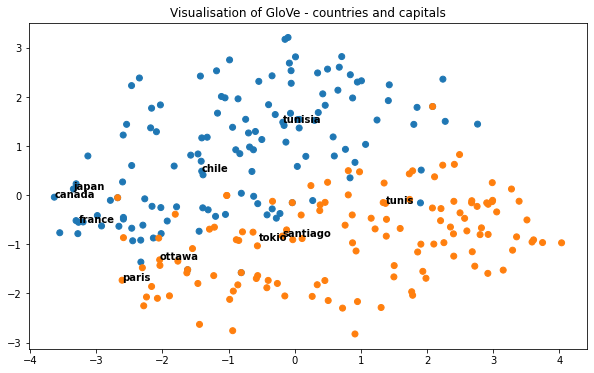

In [6]:
colours = ['tab:blue']*len(capital_country)+['tab:orange']*len(capital_country)
x_vecs, y_vecs = [v[0] for v in pca_vecs], [v[1] for v in pca_vecs]
plt.scatter(x_vecs, y_vecs, c=colours)
plt.title('Visualisation of GloVe - countries and capitals')

labels = ['chile','santiago','france','paris','japan','tokio','canada','ottawa','tunisia','tunis']
for element in labels:
    vec = pca.transform(word_vector(element).reshape(1,300))
    plt.text(vec[:,0], vec[:,1], element, fontweight='bold')

Here we have performed a PCA reduction on ~120 Capital-Country pairs, and we have have tagged some fo them.

We can visually experiment with the embedding space: let's consider the case in which we want to know which one is the capital of Chile. If we know that Paris is the capital of France, then we could try adding the vector representing the path between capitals and countries:

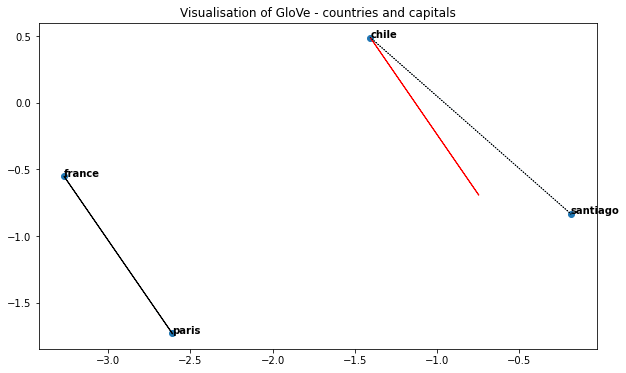

In [7]:
countries_capitals_subset = ['france','paris','chile','santiago']
pca_words = pca.transform([word_vector(word) for word in countries_capitals_subset])

x_vecs, y_vecs = [v[0] for v in pca_words], [v[1] for v in pca_words]
plt.scatter(x_vecs, y_vecs)
plt.title('Visualisation of GloVe - countries and capitals')
for element in countries_capitals_subset:
    vec = pca.transform(word_vector(element).reshape(1,300))
    plt.text(vec[:,0], vec[:,1], element, fontweight='bold')
    
# drawing arrows
vec_france, vec_paris = pca_words[0], pca_words[1]
arrow_france = vec_paris-vec_france
plt.arrow(vec_france[0],vec_france[1],arrow_france[0],arrow_france[1])
# now we approximate for Chile
vec_chile, vec_stgo = pca_words[2], pca_words[3]
# theoretical arrow
plt.arrow(vec_chile[0],vec_chile[1],arrow_france[0],arrow_france[1],color='red')
# actual arrow
arrow_chile = vec_stgo-vec_chile
plt.arrow(vec_chile[0],vec_chile[1],arrow_chile[0],arrow_chile[1],linestyle=':')

## Section 2: Visualising Semantic Relations

You're given a dataset of **adjectives** with their respective **comparatives and superlatives**.

For instance: high - higher - highest

In [8]:
words = []
with open('data/adjectives.csv') as csvfile: # Change path if necessary
    readCSV = csv.reader(csvfile)
    for row in readCSV:
        words.append(row[0])
print(words[:6])

['rougher', 'rough', 'roughest', 'meaner', 'mean', 'meanest']


### To Do:
1. Perform a PCA reduction on the set.
2. Visualise this space
3. Do you notice that GloVe encodes the relationship between the three kinds of word?

In [ ]:
### to do  ####

**Bonus task**
1. Take a subset of the words and draw arrows between the three different pairs (adj-com, adj-sup, com-sup), a color for each pair. Is it consistent? 
2. Can you think of an algorithm to automatically detect whether it is a base adjective, comparative or superlative?

In [ ]:
### to do ###